# 1. 라이브러리 불러오기

In [572]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic  
import scipy.stats as spst
import koreanize_matplotlib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'


# 2. 정식 웹툰 데이터 분석

## 1 ) 데이터 확인

In [575]:
# 데이터 불러오기
naver = pd.read_csv('naver.csv')

# 데이터 확인
naver.head()

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


- naver.csv
| 변수명       | 설명                          |
|--------------|-------------------------------|
| id           | 웹툰의 고유 ID                |
| title        | 웹툰 제목                     |
| author       | 작가                          |
| genre        | 장르                          |
| description  | 웹툰 소개                     |
| rating       | 웹툰의 평균 평점 (10점 만점)  |
| date         | 웹툰의 최신 업데이트 날짜     |
| completed    | 연재 완료 여부                |
| age          | 추천 연령                     |
| free         | "기다리면 무료" 이벤트 가능 여부 |
| link         | 웹툰 링크                     |


In [577]:
# 전체 정보 확인
naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2100 non-null   int64  
 1   title        2100 non-null   object 
 2   author       2100 non-null   object 
 3   genre        2100 non-null   object 
 4   description  2100 non-null   object 
 5   rating       2100 non-null   float64
 6   date         2100 non-null   object 
 7   completed    2100 non-null   bool   
 8   age          1998 non-null   object 
 9   free         2100 non-null   bool   
 10  link         2100 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 151.9+ KB


In [578]:
# 통계량 확인
naver.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2100.0,678611.872381,188885.351892,15439.00,679568.75,748683.5,784821.25,804418.00
rating,2100.0,9.736071,0.559215,3.81,9.77,9.9,9.95,9.99


## 2) EDA

In [580]:
# 결측값 확인
naver.isna().sum()

id               0
title            0
author           0
genre            0
description      0
rating           0
date             0
completed        0
age            102
free             0
link             0
dtype: int64

- genre ,rating ,completed ,age, free 분석해보겠음

- genre 분석

In [583]:
# 콤마를 기준으로 되어있는걸 분해해보겠음
naver[['genre1', 'genre2']] = naver['genre'].str.split(',',expand = True)  
naver.drop(columns ='genre', inplace = True)

# 확인
naver.head()

,id,title,author,description,rating,date,completed,age,free,link,genre1,genre2
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,스토리,로맨스
1,670144,가담항설,랑또,이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,스토리,판타지
2,732071,가령의 정체불명 이야기,가령,어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,옴니버스,드라마
3,703844,가비지타임,2사장,"한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,스포츠
4,785701,가상&RPG,주다현,"""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,판타지


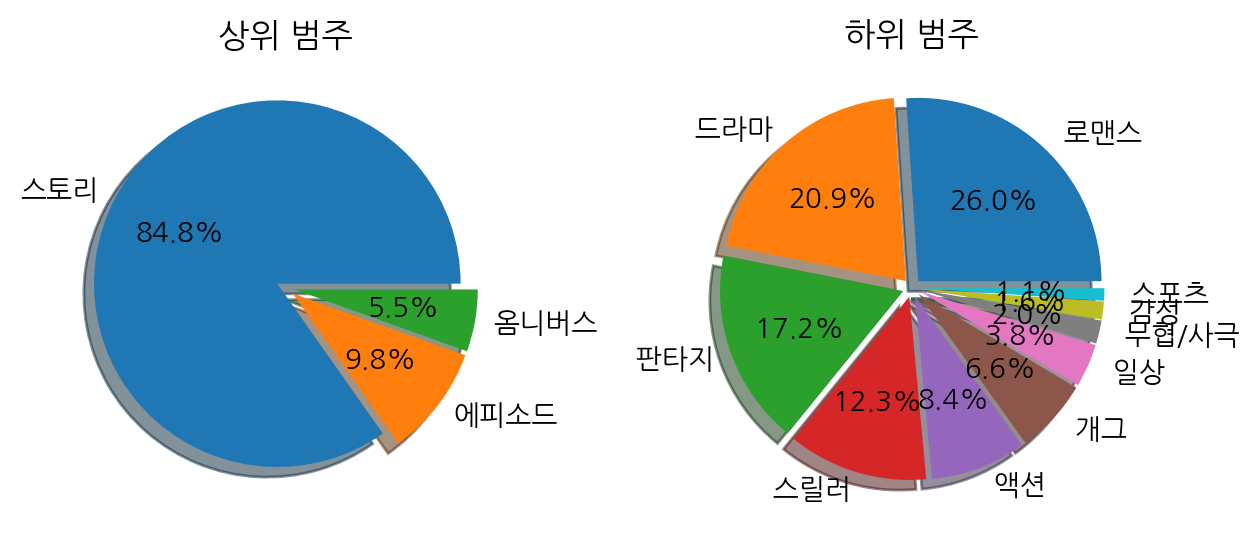

In [584]:
# 파이차트로 확인해보기
genre1_count = naver['genre1'].value_counts()
genre2_count = naver['genre2'].value_counts()

plt.subplot(1,2,1)
plt.title("상위 범주", pad=5)
plt.pie(genre1_count, labels= genre1_count.index, explode = [0.05,0.05,0.05], shadow = True , autopct='%.1f%%')

plt.subplot(1,2,2)
plt.title("하위 범주", pad=5)
plt.pie(genre2_count, labels=genre2_count.index, explode=[0.05]*10, shadow=True, autopct='%.1f%%')

plt.tight_layout()
plt.show()

- rating 분석

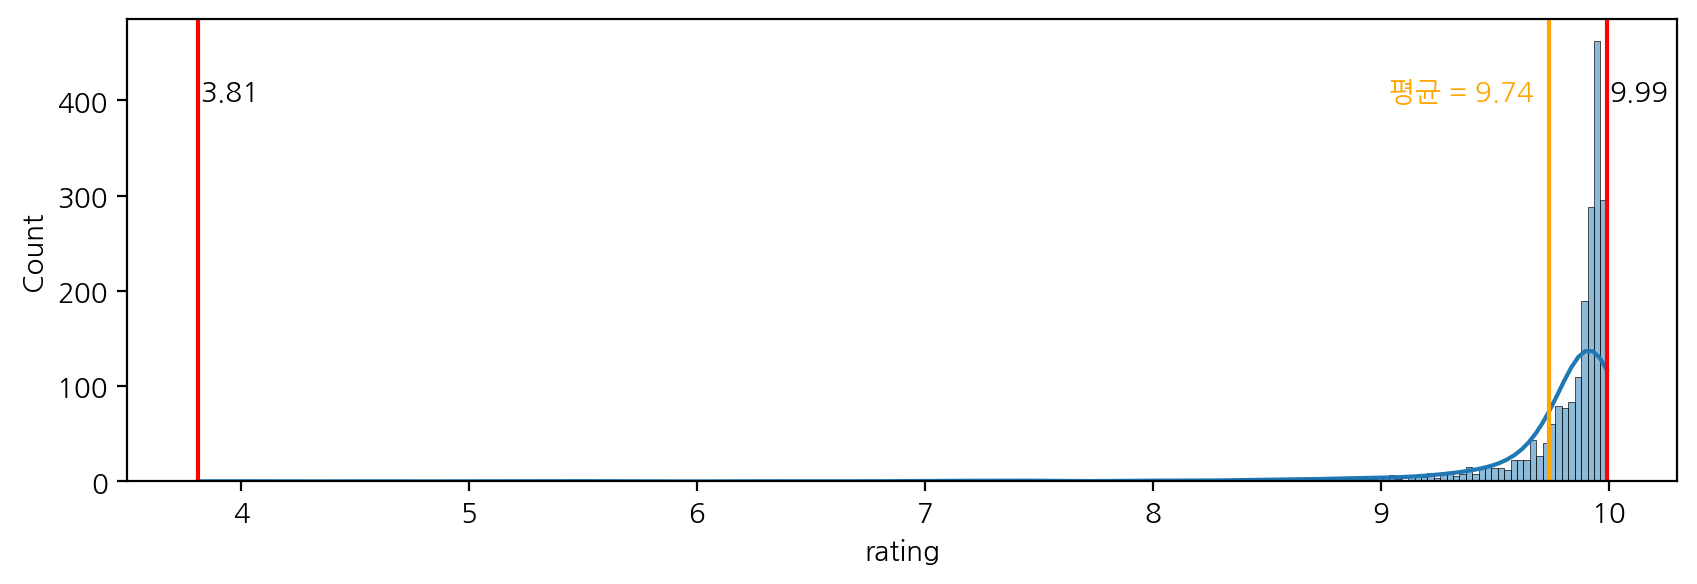

In [586]:
plt.figure(figsize=(10,3))
sns.histplot(naver['rating'], kde=True)
plt.axvline(naver['rating'].min(),color = 'red')
plt.text(naver['rating'].min()+0.01, 400, naver['rating'].min())
plt.axvline(naver['rating'].max(),color = 'red')
plt.text(naver['rating'].max()+0.01, 400, naver['rating'].max())
plt.axvline(naver['rating'].mean(),color = 'orange')
plt.text(naver['rating'].mean()-0.7, 400, f'평균 = {naver['rating'].mean().round(2)}',color = 'orange')
plt.show()

- completed 분석

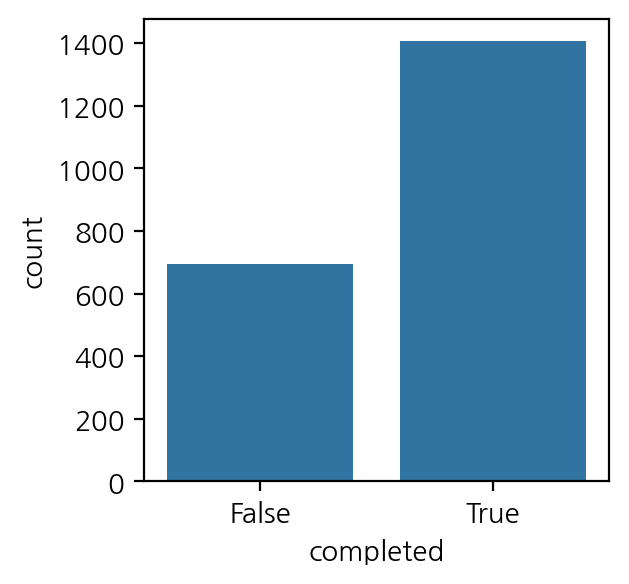

In [588]:
plt.figure(figsize =(3,3))
sns.countplot(x=naver['completed'])
plt.show()

- age 분석 --> 이건 결측치가 있었음

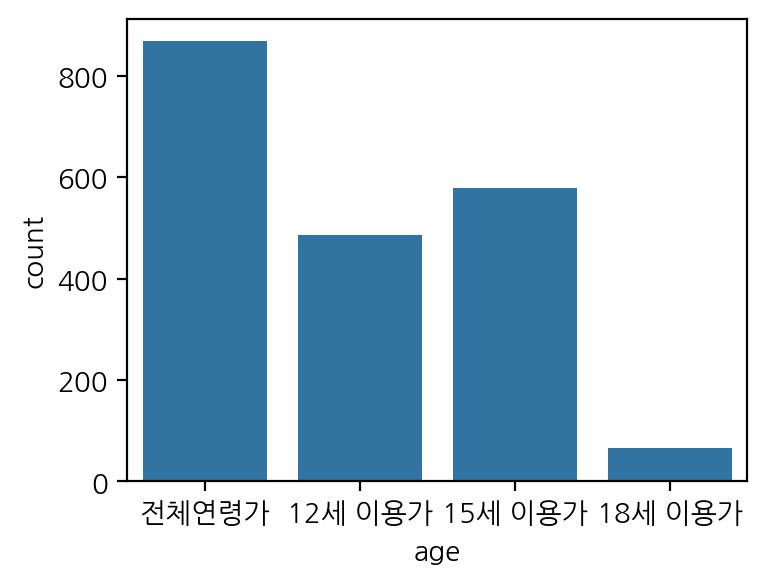

In [590]:
plt.figure(figsize =(4,3))
sns.countplot(x=naver['age'])
plt.show()

In [591]:
# 결측치가 있는 행들 확인
temp = naver[naver['age'].isna()]
temp.groupby(by= ['genre1'],as_index = False)['age'].size()
#temp.groupby(by= ['genre1','genre2'],as_index = False)['age'].size()

,genre1,size
0,스토리,99
1,에피소드,1
2,옴니버스,2


In [592]:
# 결측치가 없는 애들 분포 보고싶었음
naver.pivot_table(index ='age',columns=['genre1','genre2'], values='id',aggfunc='count',fill_value=0,margins= True ).T

age            12세 이용가  15세 이용가  18세 이용가  전체연령가   All
genre1 genre2                                        
스토리     감성           0        3        0     15    18
        개그          28        6        0     32    66
        드라마        102       77       10    160   349
        로맨스        101      100        5    283   489
        무협/사극       13       15        1     10    39
        스릴러         22      144       32      9   207
        스포츠          4        5        0     11    20
        액션          40       92        6     22   160
        일상           1        0        0      7     8
        판타지        114       92        5    114   325
에피소드    감성           0        0        0     13    13
        개그           7        0        0     44    51
        드라마          5        4        1     25    35
        로맨스          3        5        1     11    20
        무협/사극        1        1        0      0     2
        스릴러          2        6        0      1     9
        스포츠          0        0        0      2     2
        액션           2        7        0      0     9
        일상           5        0        0     51    56
        판타지          0        2        2      3     7
옴니버스    감성           0        0        0      1     1
        개그          10        0        0      8    18
        드라마          6        1        0     22    29
        로맨스          1        0        0      4     5
        무협/사극        1        0        0      0     1
        스릴러         11       14        3      2    30
        스포츠          0        0        0      1     1
        일상           3        0        0     11    14
        판타지          4        4        0      6    14
All                486      578       66    868  1998

스토리- 스릴러에 꾸금이 많네. 고어인가

In [594]:
temp[['description']]

,description
44,취업 면접에서 번번이 미끄러지는 순진은 자신 때문에 사고를 당해 휠체어 신세가 된 ...
117,[“110억이면 인생 걸만 하잖아?”]마늘밭에 잠들어 있던 욕망의 구덩이가 파헤쳐지...
125,"마왕이 사라진뒤 몇 년 후, 구원자의 꿈에 다시 마왕이 나타난다. 자신을 구해달라는..."
133,"“그래, 왕이 되었지. 가지고 싶은 건 다 빼앗아 가지려고.”왕위를 찬탈하고 주변국..."
163,카이엔 백작가의 후계자로서 레인저 부대의 부대장으로 살아가던 브릴리아. 그녀는 동생...
...,...
2019,만화가인 아빠의 작품 중에서 강철이 최애캐인 연주는 평범한 일상을 보내던 어느 날 ...
2020,"괴현상으로 무너지는 세계, 그리고 세 남녀. 정신을 차려보니 어두운 지하실에 묶여..."
2023,부모가 남긴 빚을 떠안고 힘겹게 살아가는 유민아. 불어난 빚을 받기 위해 고시원으로...
2026,"고백 받고, 차이는 상황이 일상이 된 소꿉친구 율과 시호. 연인으로 발전할 것인가,..."


- 설명들 보니 15세로 설정해놓는게 나을 거 같음. 전체이용가라고 하기엔 다소 폭력적인 면모도 들어가 있는거 같음

In [596]:
# 결측치는 15세 이용가로 채우기
naver['age'] = naver['age'].fillna('15세 이용가')

- free 분석

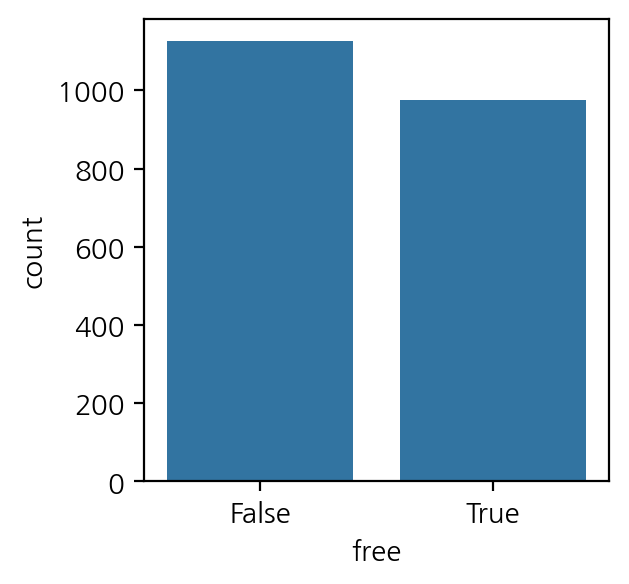

In [598]:
plt.figure(figsize =(3,3))
sns.countplot(x=naver['free'])
plt.show()

## 3) 가설 분석 ( CDA )

### a. completed - rating ->  관련있다

1. 가설: 연재 완료 여부(`completed`)가 웹툰의 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 연재가 완료된 웹툰이 완료되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다

 
 

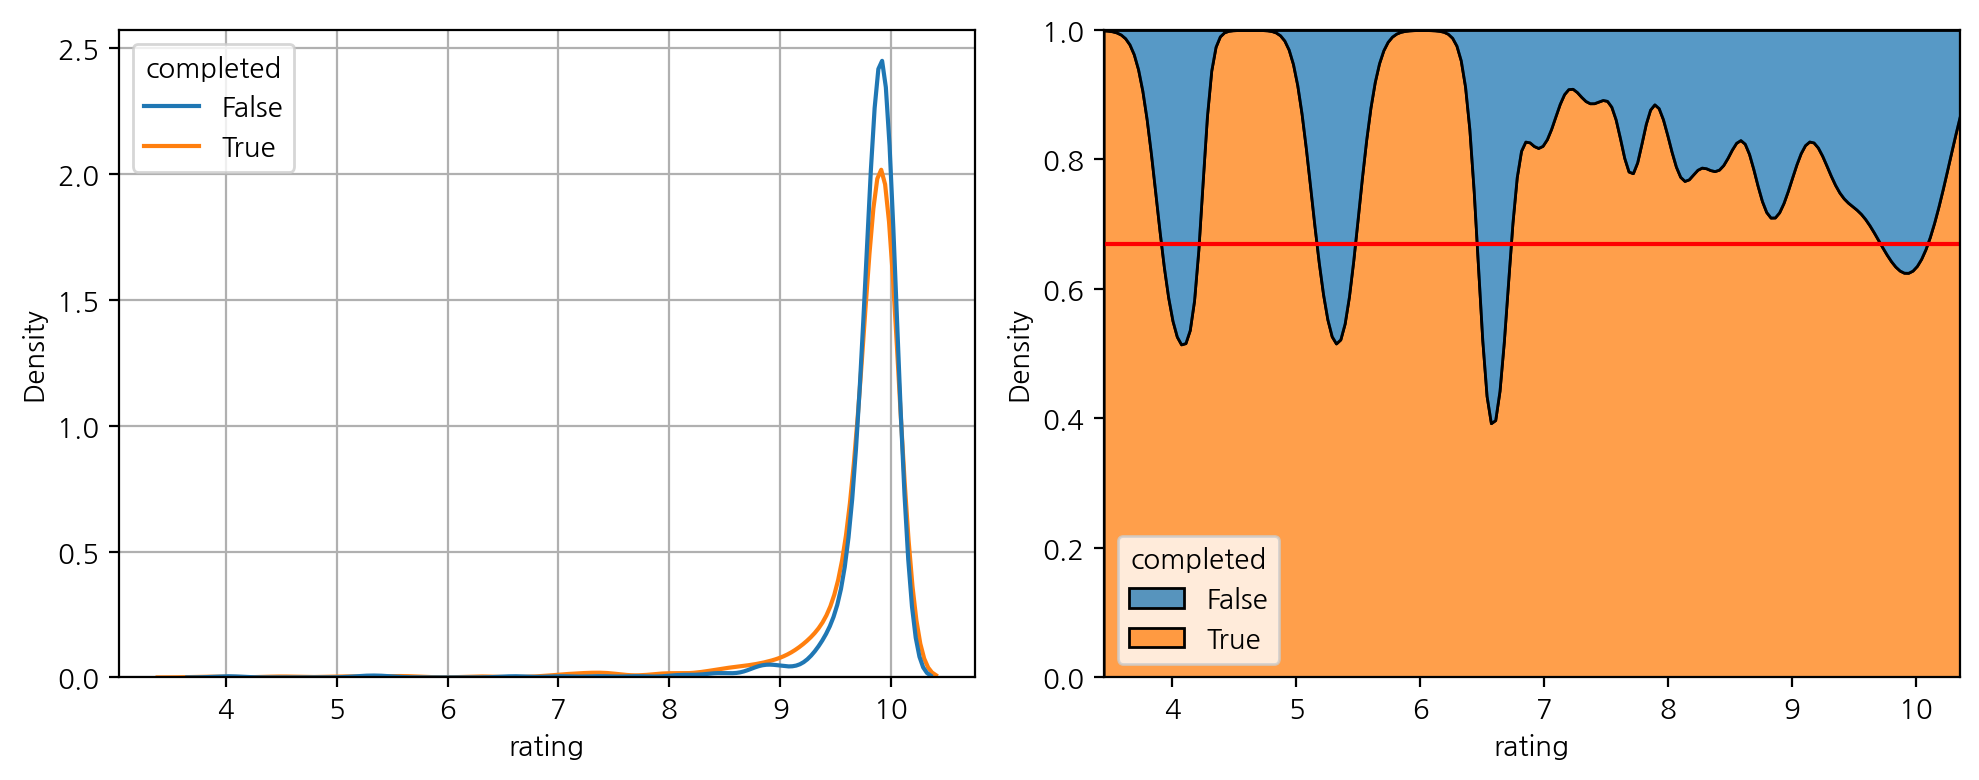

In [602]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x='rating', data = naver, hue ='completed',
            common_norm = False)
plt.grid()


plt.subplot(1,2,2)
sns.kdeplot(x='rating', data = naver, hue ='completed'
            , multiple = 'fill')
plt.axhline(naver['completed'].mean(), color = 'r')

plt.tight_layout()
plt.show()

- 왼쪽 그래프를 보면 그리 엄청 차이나는 분포를 보이는 것은 아님.
- 오른쪽 그래프를 보면 좀 낮는 점수인 경우가 완결 하지 못한 게 좋 많고, 높은 점수에는 거진 완결한 걸 볼 수 있음.

In [604]:
# 검정 테스트  -> 정규분포를 띄지않아 비모수인 경우 분석법으로 검증함
from scipy.stats import mannwhitneyu

success = naver.loc[naver['completed']==True,'rating']
fail = naver.loc[naver['completed']==False,'rating']

# Mann-Whitney U 테스트  --> 두 집단의 측정값에 순위를 매겨 그 차이를 통계 비교함
stat, p = mannwhitneyu(success, fail)
print(f'statistic={stat}, pvalue={p}')


statistic=459031.5, pvalue=0.02709952950781813


### b. genre - rating  -> genre1 : X , genre2 : O

   
2. 가설: 장르(`genre`)가 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 특정 장르(예: 로맨스, 드라마)가 다른 장르에 비해 평균적으로 더 높은 평점을 받을 것이다.

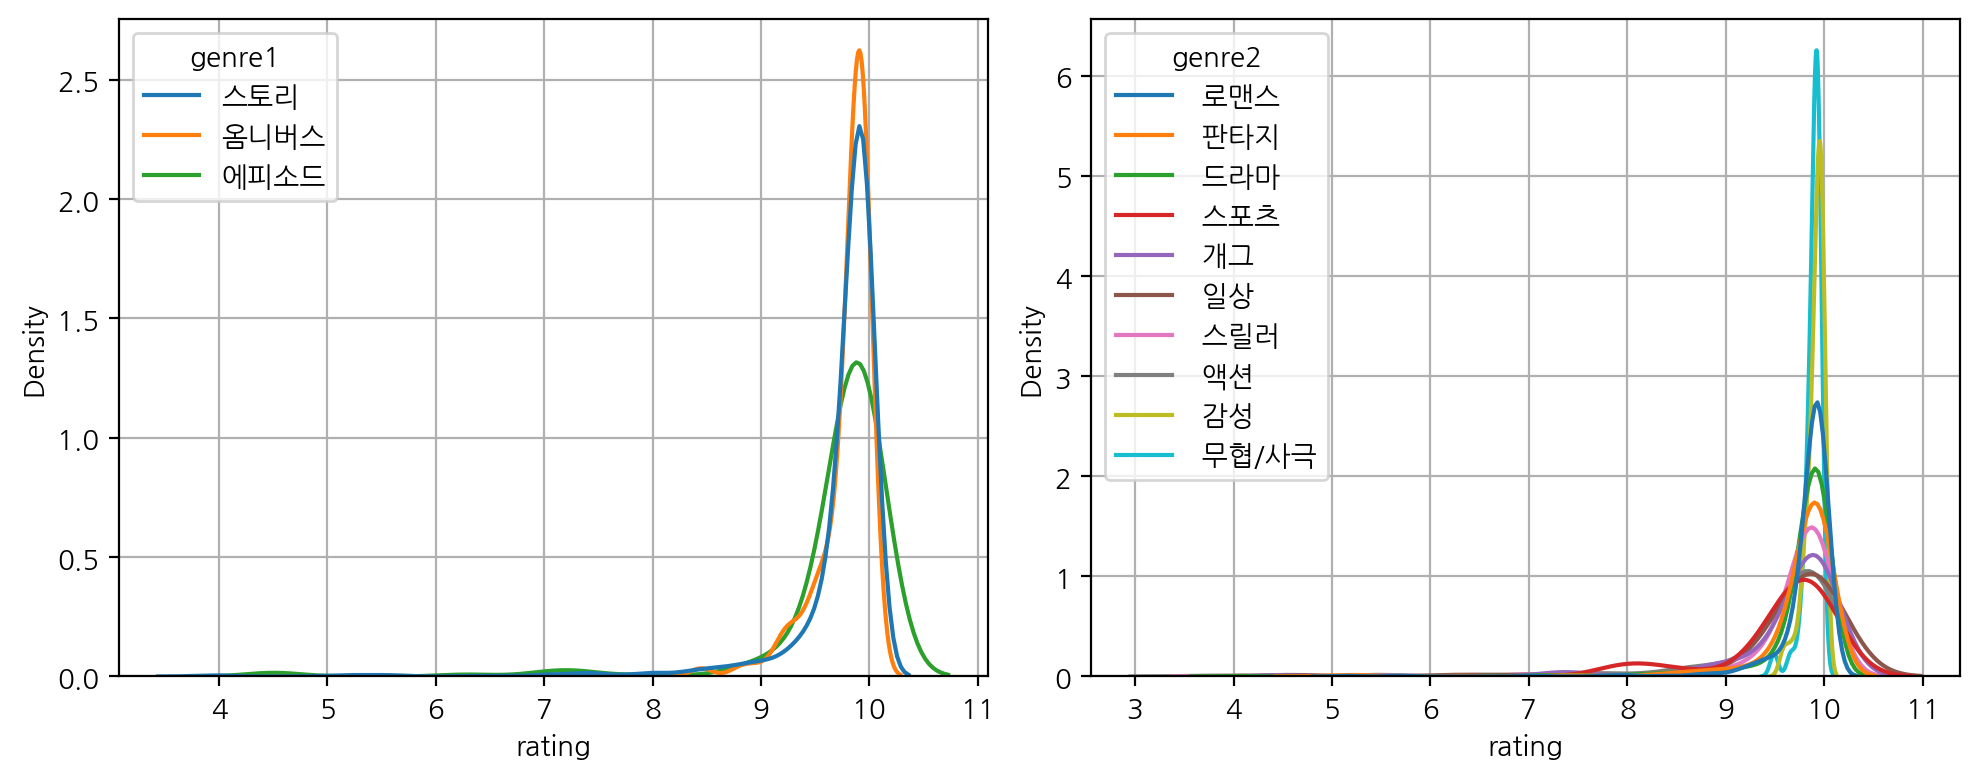

In [607]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x='rating', data = naver, hue ='genre1',
            common_norm = False)
plt.grid()


plt.subplot(1,2,2)
sns.kdeplot(x='rating', data = naver, hue ='genre2',
            common_norm = False)
plt.grid()
plt.tight_layout()
plt.show()

In [608]:
temp = naver.loc[naver['genre1']=='옴니버스']
print(f'옴니버스 최소값  = {temp['rating'].min()}')
print(f'옴니버스 최대값  = {temp['rating'].max()}')
print()

옴니버스 최소값  = 8.45
옴니버스 최대값  = 9.98



In [609]:
# 이건 변수가 3개 이상이라 크루스칼로 검증해야함.
from scipy.stats import kruskal

# genre1 과 rating 비교
story = naver.loc[naver['genre1']=='스토리','rating']
omni = naver.loc[naver['genre1']=='옴니버스','rating']
epi = naver.loc[naver['genre1']=='에피소드','rating']

stat, p = kruskal(story,omni,epi)
print(f'statistic={stat}, pvalue={p}')


statistic=2.112015121411037, pvalue=0.3478417789778876


genre1과는 관련이 없음

In [611]:
g_2 = naver['genre2'].unique()
stat, p = kruskal(*[naver.loc[naver['genre2'] == g, ['rating']] for g in g_2])
print(f'statistic={stat}, pvalue={p}')

statistic=[100.40075797], pvalue=[1.30557781e-17]


genre2는 관련있음  
통계값은 집단간 차이를 보여준는 것이고, p값은 0.05보다 작음

### c. free - rating -> 관련있음

    
3. 가설: 연령 제한(`age`)이 기다리면 무료 여부(`free`)에 영향을 줄 것이다.
    
    설명: 낮은 연령층을 타겟으로 한 웹툰일수록 기다리면 무료 이벤트가 적용될 확률이 높을 것이다.

In [615]:
# 이거 정규분포를 띄고 있는지 확인할 수 있는 검증법
from scipy.stats import shapiro

stat, p = shapiro(naver['free'])
print(f'Statistic={stat}, p-value={p}')


Statistic=0.6347577645356874, p-value=4.6669487730256574e-55


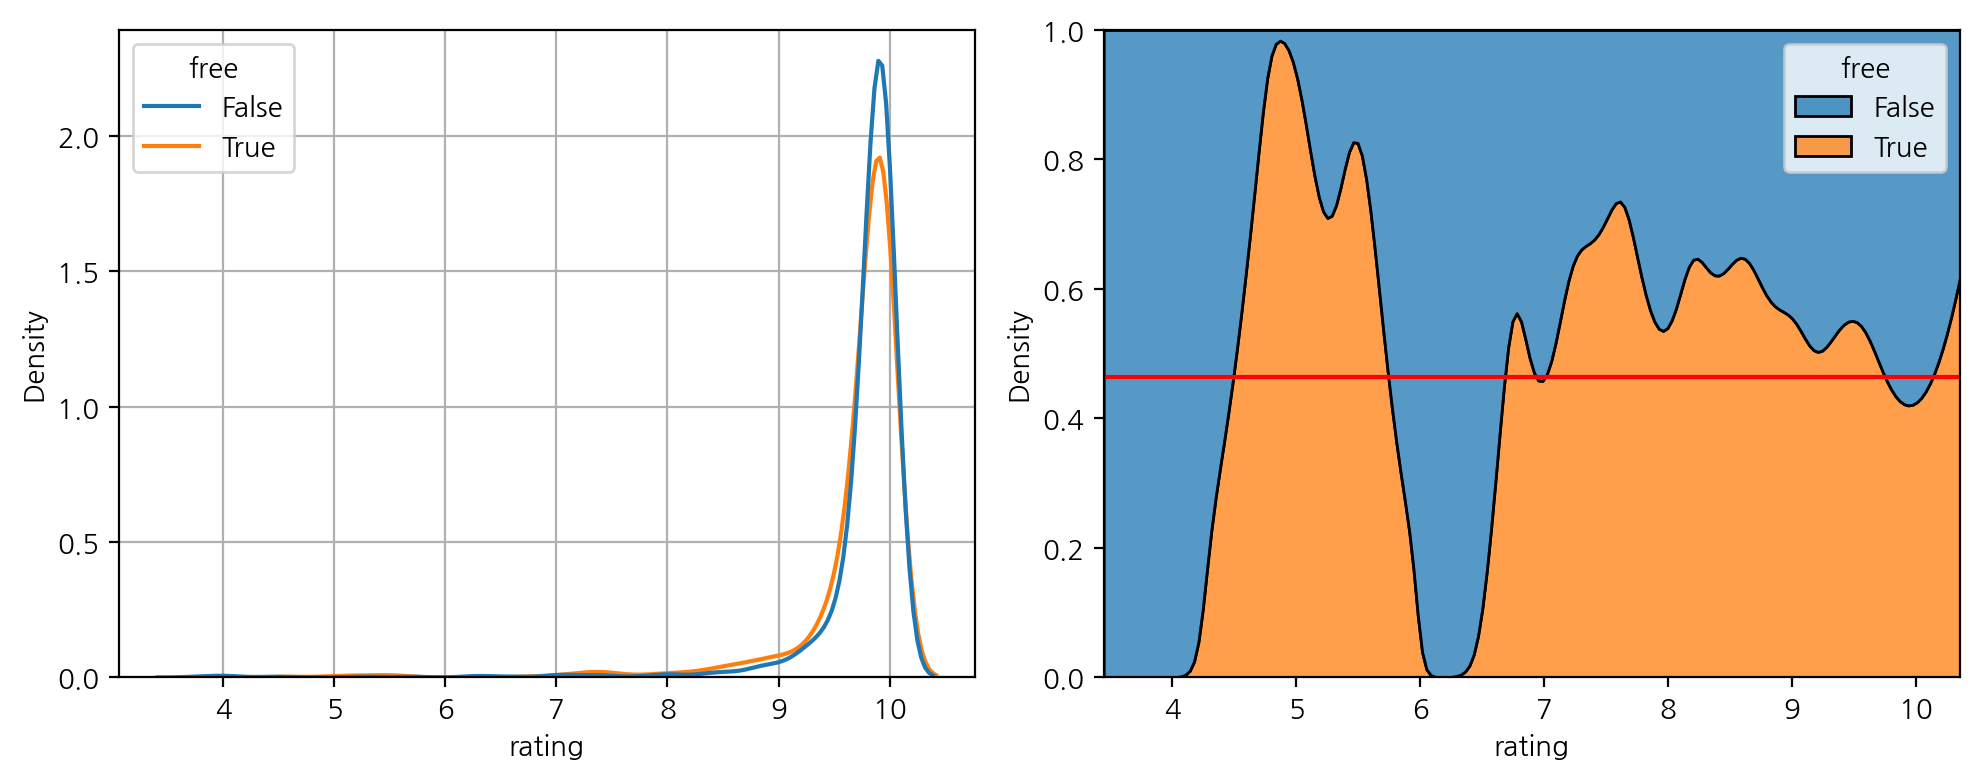

In [616]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x='rating', data = naver, hue ='free',
            common_norm = False)
plt.grid()


plt.subplot(1,2,2)
sns.kdeplot(x='rating', data = naver, hue ='free'
            , multiple = 'fill')
plt.axhline(naver['free'].mean(), color = 'r')

plt.tight_layout()
plt.show()

In [617]:
yes = naver.loc[naver['free']==True,'rating']
no = naver.loc[naver['free']==False,'rating']

# Mann-Whitney U 테스트  --> 두 집단의 측정값에 순위를 매겨 그 차이를 통계 비교함
stat, p = mannwhitneyu(yes, no)
print(f'statistic={stat}, pvalue={p}')


statistic=512272.5, pvalue=0.008975242637642229


# 3. 베스트 도전 데이터 분석

## 1 ) 데이터 확인

In [620]:
# 데이터 불러오기
challenge = pd.read_csv('naver_challenge.csv')

# 데이터 확인
challenge.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...


- challenge 데이터
| 변수명       | 설명                        |
|--------------|-----------------------------|
| id           | 웹툰의 고유 ID              |
| title        | 웹툰 제목                   |
| author       | 작가 (마지막 문자열은 생략) |
| summary      | 웹툰 요약                   |
| rating       | 웹툰의 평점                 |
| genre        | 장르                        |
| format       | 웹툰 형식                   |
| description  | 웹툰 설명                   |
| serialize    | 네이버 정식 연재 여부       |
| potenup      | 포텐업 선정 여부            |


In [622]:
# 데이터 정보 확인
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3192 non-null   int64  
 1   title        3192 non-null   object 
 2   author       3192 non-null   object 
 3   summary      3191 non-null   object 
 4   rating       3192 non-null   float64
 5   genre        3192 non-null   object 
 6   format       3192 non-null   object 
 7   description  3192 non-null   object 
 8   serial       3192 non-null   bool   
 9   potenup      3192 non-null   bool   
 10  link         3192 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 230.8+ KB


In [623]:
# 통계량 확인
challenge.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3192.0,632774.682018,167869.962401,3955.00,584652.75,690407.50,738146.50,803576.00
rating,3192.0,9.639395,0.387941,5.38,9.59,9.78,9.86,9.92


## 2 ) EDA

In [625]:
# 결측치 확인
challenge.isna().sum()

id             0
title          0
author         0
summary        1
rating         0
genre          0
format         0
description    0
serial         0
potenup        0
link           0
dtype: int64

- rating ,genre , format ,serialize , potenup 분석

- rating 분석

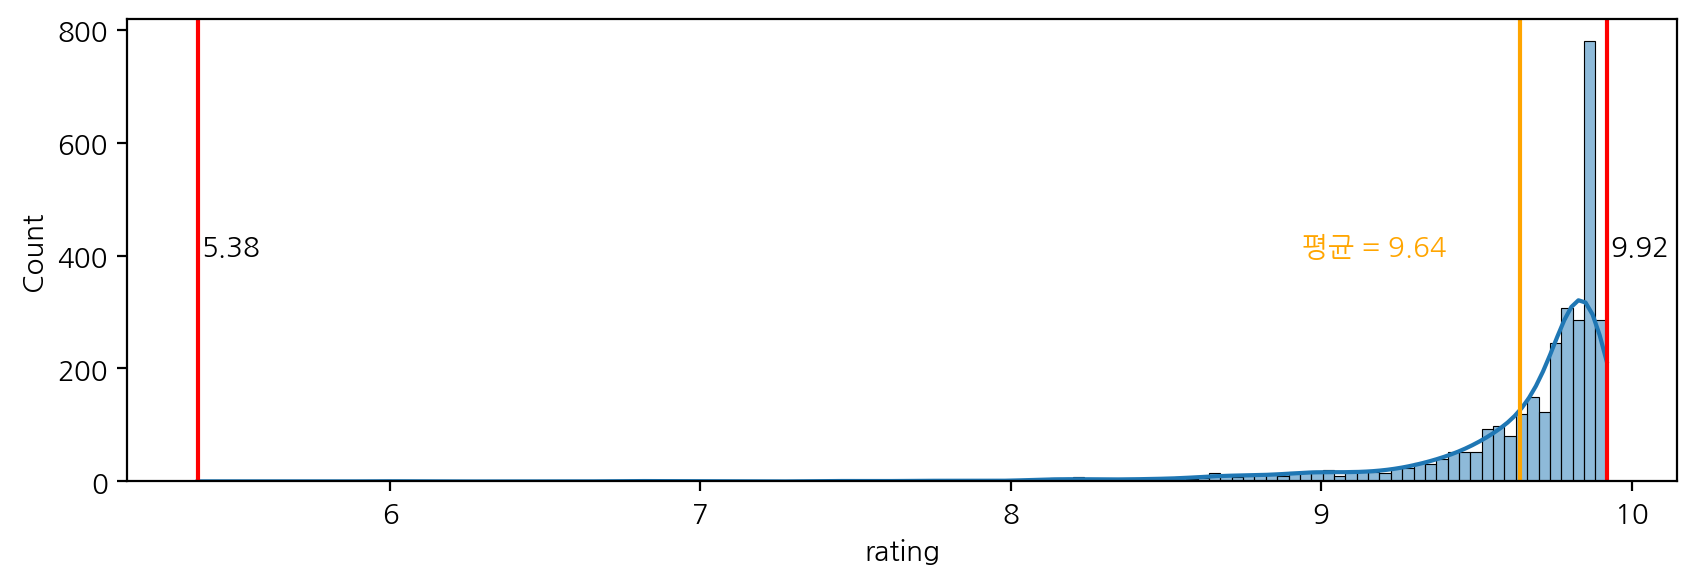

In [628]:
plt.figure(figsize=(10,3))
sns.histplot(challenge['rating'], kde=True)
plt.axvline(challenge['rating'].min(),color = 'red')
plt.text(challenge['rating'].min()+0.01, 400, challenge['rating'].min())
plt.axvline(challenge['rating'].max(),color = 'red')
plt.text(challenge['rating'].max()+0.01, 400, challenge['rating'].max())
plt.axvline(challenge['rating'].mean(),color = 'orange')
plt.text(challenge['rating'].mean()-0.7, 400, f'평균 = {challenge['rating'].mean().round(2)}',color = 'orange')
plt.show()

- genre , format 분석

In [630]:
# 콤마를 기준으로 되어있는걸 분해해보겠음
challenge[['genre1', 'genre2']] = challenge['genre'].str.split(',',expand = True)  
challenge.drop(columns ='genre', inplace = True)

# 확인
challenge.head()

,id,title,author,summary,rating,format,description,serial,potenup,link,genre1,genre2
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,drama


정식웹툰 데이터에서 genre1 에 해당하는게 format인듯. 근데 저 \n\n은 왜 있는거임?

In [632]:
challenge['format'].value_counts()

format
스토리\n\n    2069
에피소드        852
옴니버스        271
Name: count, dtype: int64

In [633]:
# 스토리 수정
challenge['format'] = challenge['format'].replace('스토리\n\n', '스토리')

In [634]:
# 확인
challenge['format'].value_counts()

format
스토리     2069
에피소드     852
옴니버스     271
Name: count, dtype: int64

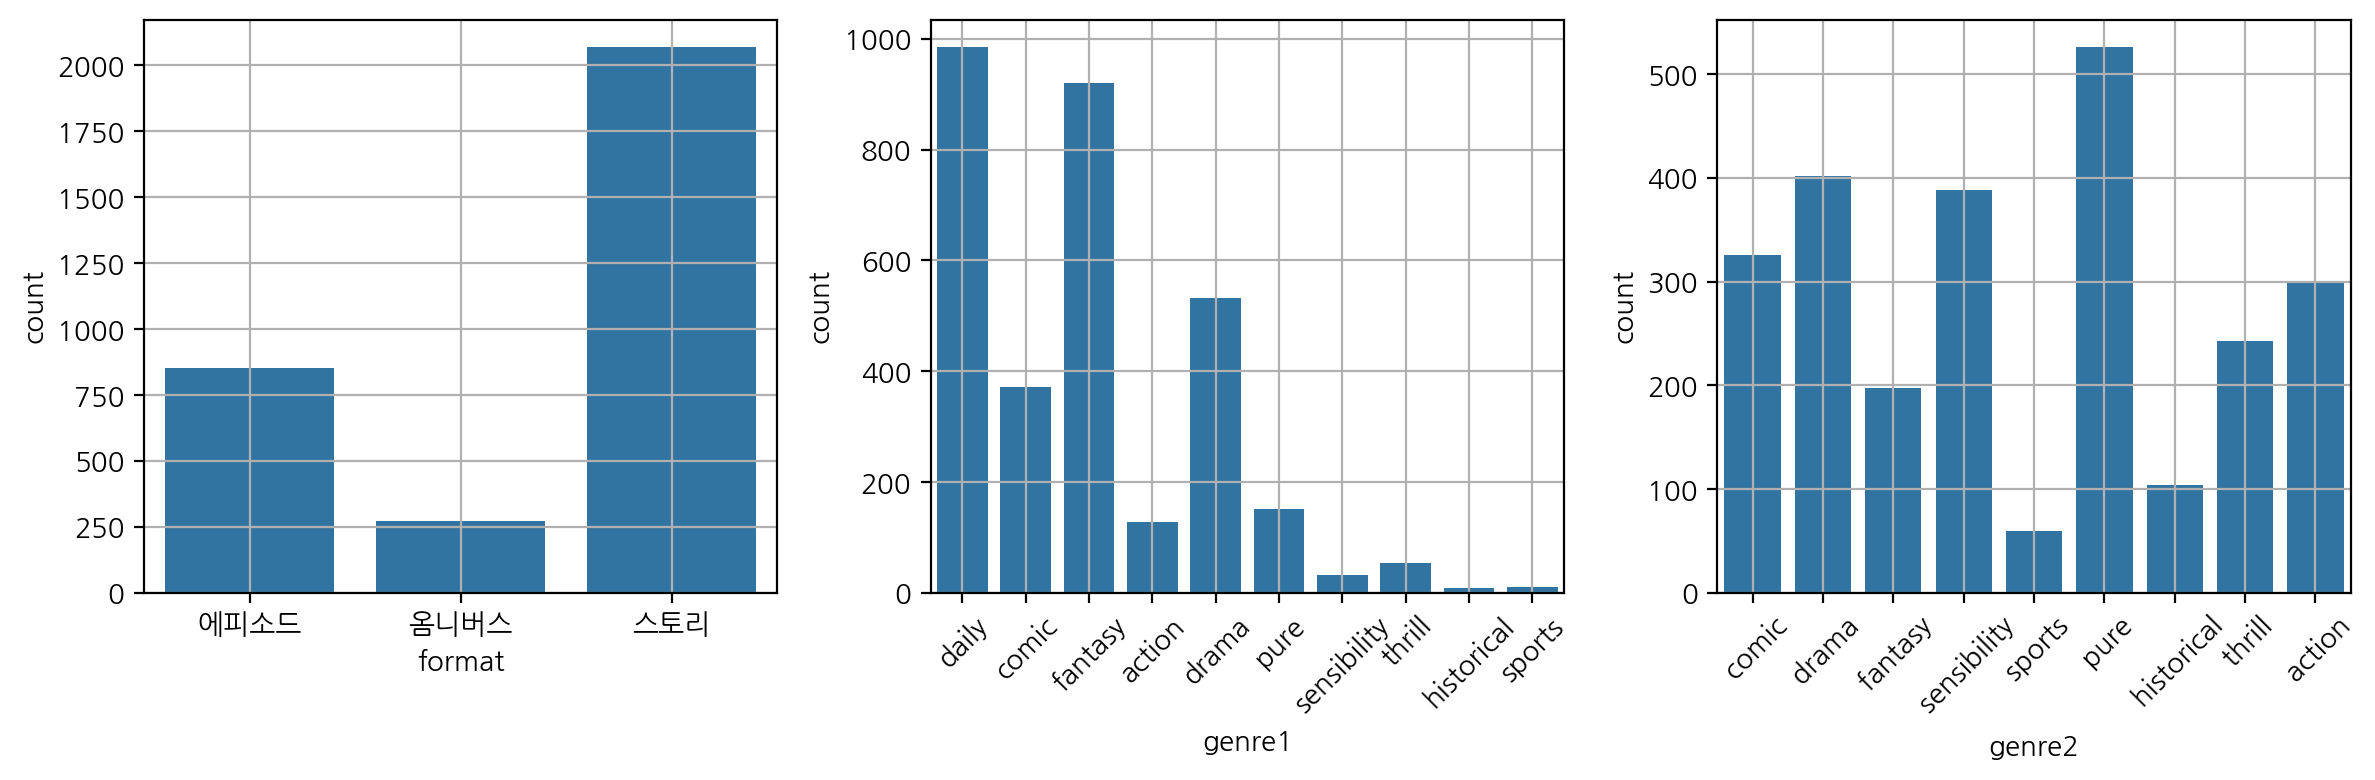

In [635]:
# 그래프 확인
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(x=challenge['format'])
plt.grid()

plt.subplot(1,3,2)
sns.countplot(x=challenge['genre1'])
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1,3,3)
sns.countplot(x=challenge['genre2'])
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

In [636]:
# 결측치 확인
challenge.isna().sum()

id               0
title            0
author           0
summary          1
rating           0
format           0
description      0
serial           0
potenup          0
link             0
genre1           0
genre2         647
dtype: int64

- serialize 분석

In [638]:
challenge['serial'].value_counts(normalize = True)

serial
False    0.936717
True     0.063283
Name: proportion, dtype: float64

- potenup 분석

In [640]:
challenge['potenup'].value_counts(normalize = True)

potenup
False    0.999373
True     0.000627
Name: proportion, dtype: float64

## 3 ) 가설 분석 ( CDA )

### a. potenup - rating  -> 관련 없음

1. 가설: 포텐업 선정 여부(`potenup`)가 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 포텐업에 선정된 웹툰이 선정되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다.

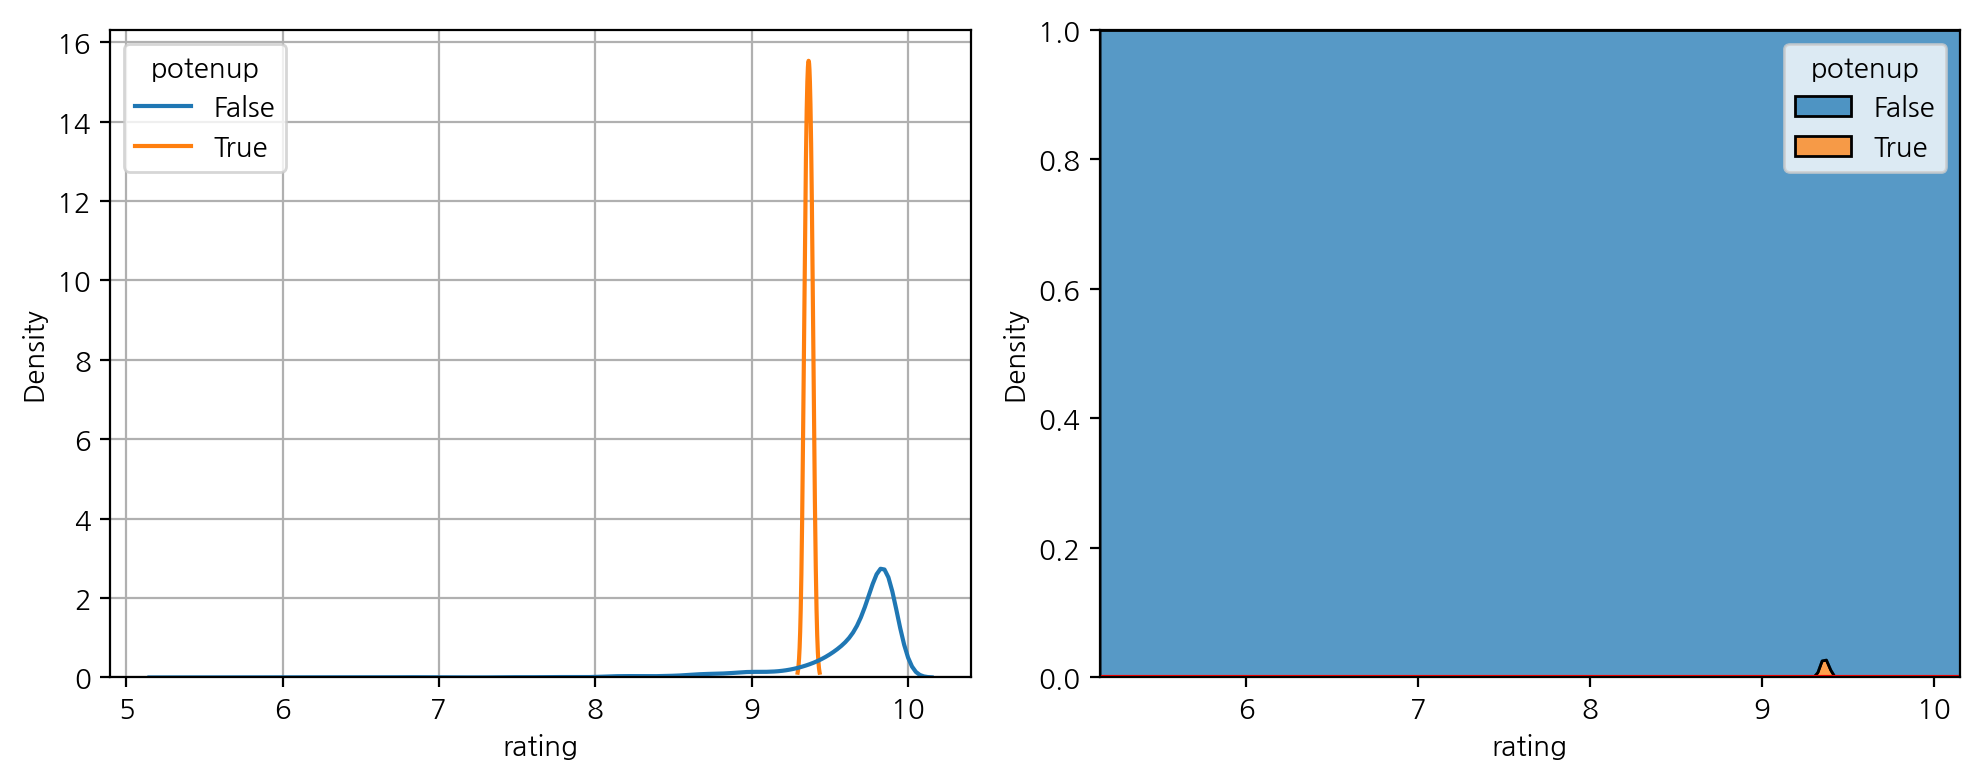

In [644]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x='rating', data = challenge, hue ='potenup',
            common_norm = False)
plt.grid()


plt.subplot(1,2,2)
sns.kdeplot(x='rating', data = challenge, hue ='potenup'
            , multiple = 'fill')
plt.axhline(challenge['potenup'].mean(), color = 'r')

plt.tight_layout()
plt.show()

- 웹툰작가의 절망편 보는 기분 , 오른쪽 그래프 거의 바닥에 빨간선이 있음. 이거 무슨 흔적기관..
- 이거 따로 검증 안해도 관련 있는 거로 나올거 같음

In [689]:
# 검정 테스트  -> 정규분포를 띄지않아 비모수인 경우 분석법으로 검증함
from scipy.stats import mannwhitneyu

success = challenge.loc[challenge['potenup']==True,'rating']
fail = challenge.loc[challenge['potenup']==False,'rating']

# Mann-Whitney U 테스트  --> 두 집단의 측정값에 순위를 매겨 그 차이를 통계 비교함
stat, p = mannwhitneyu(success, fail)
print(f'statistic={stat}, pvalue={p}')


statistic=843.5, pvalue=0.07157446633996165


 의외로 p값이 0.05보다 커서..관련없음..

### b. genre - serial -> 관련 없음

    
2. 가설: 장르(`genre`)가 정식 연재 여부(`serialize`)에 영향을 줄 것이다.
    
    설명: 특정 장르(예: 판타지, 드라마)가 다른 장르보다 정식 연재될 확률이 높을 것이다.

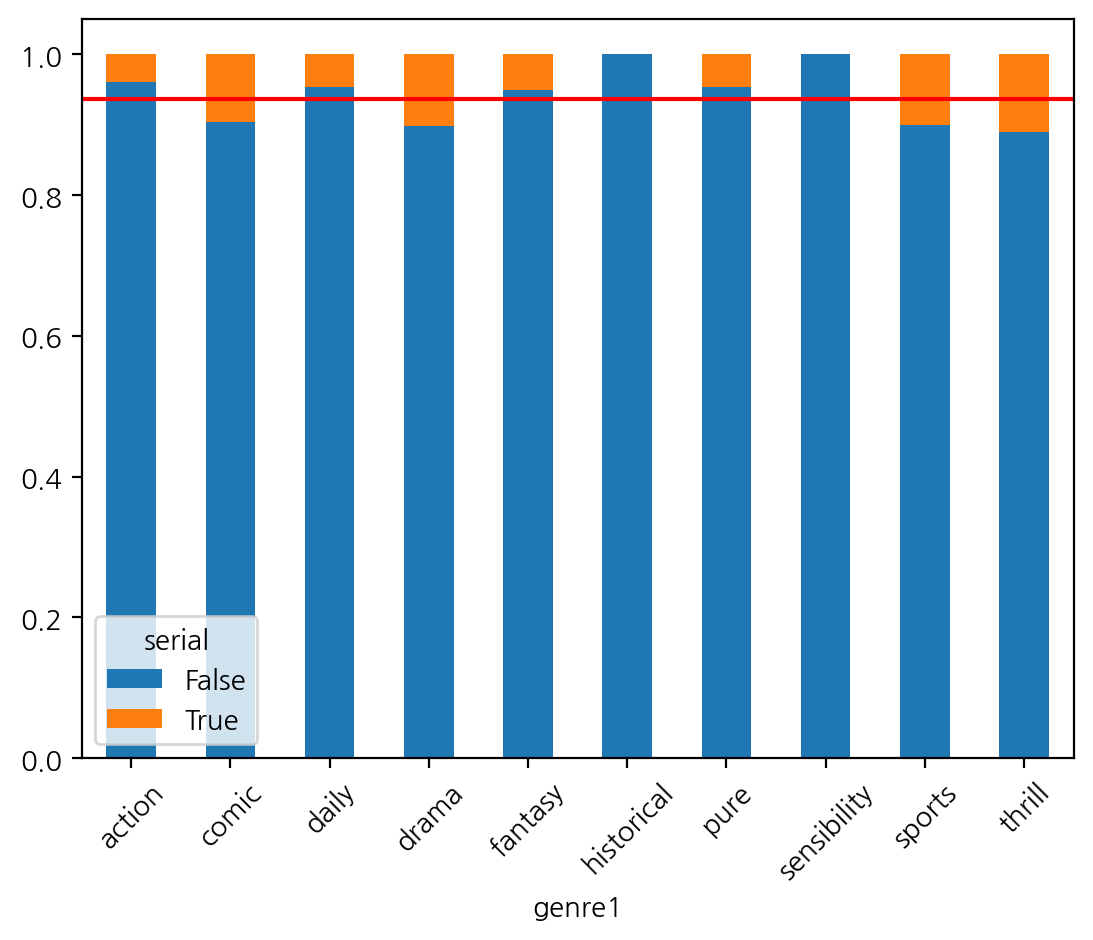

Chi2ContingencyResult(statistic=0.2752168968438985, pvalue=0.9999977288576671, dof=9, expected_freq=array([[0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042],
       [0.94070958, 0.05929042]]))

In [714]:
# genre1 과  serial 
genre1 =pd.crosstab(challenge['genre1'], challenge['serial'],normalize='index')
# mosaic(challenge, ['genre1','serial'])
# plt.axhline(1- challenge['serial'].mean(), color = 'r')
# plt.show()

genre1.plot.bar(stacked=True)
plt.axhline(1-challenge['serial'].mean(), color = 'r')
plt.xticks(rotation =45)
plt.show()

spst.chi2_contingency(genre1)

- genre1과 serial은 관련 없음

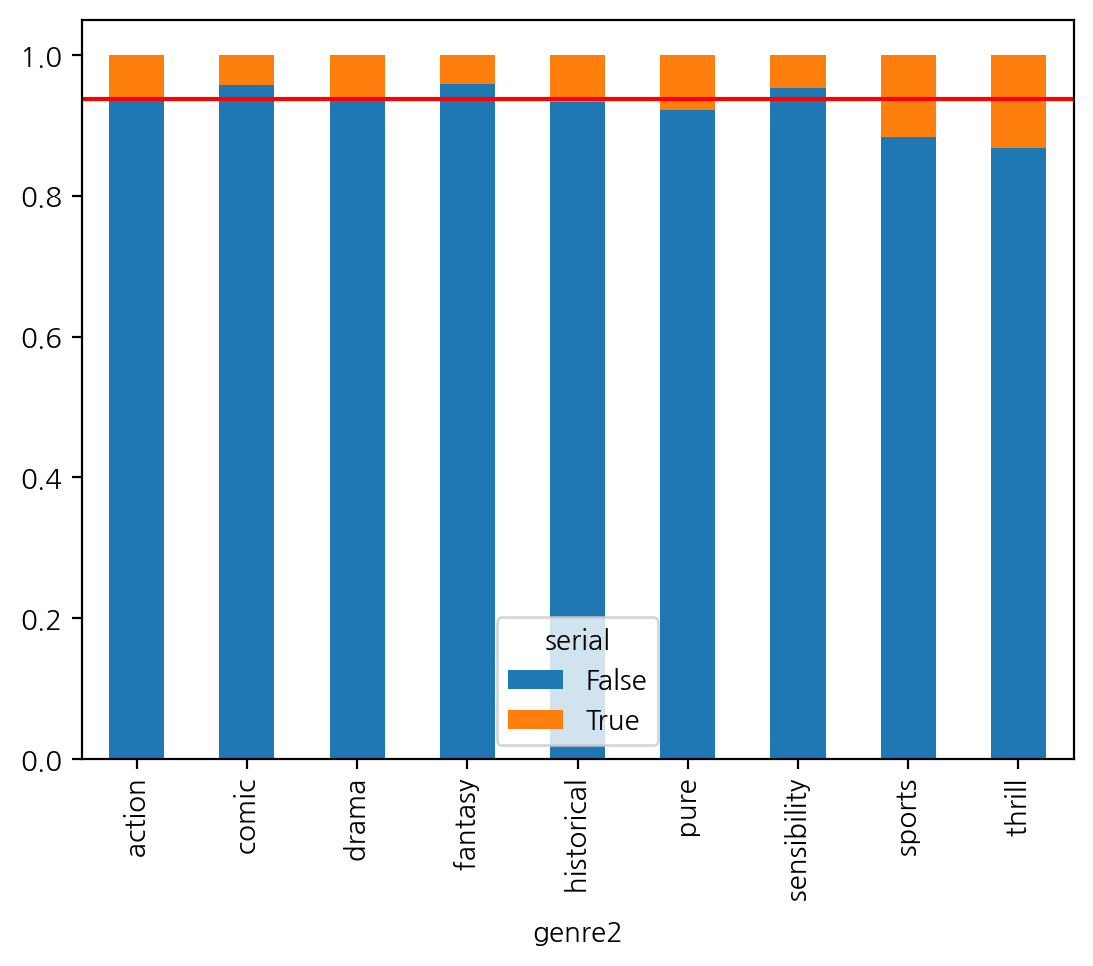

Chi2ContingencyResult(statistic=0.12636584974242732, pvalue=0.9999993686664519, dof=8, expected_freq=array([[0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513],
       [0.92850487, 0.07149513]]))

In [717]:
# genre2 와 serial
genre2 =pd.crosstab(challenge['genre2'], challenge['serial'], normalize='index')
# mosaic(challenge, [ 'genre2','serial'])
# plt.axhline(1- challenge['serial'].mean(), color = 'r')
# plt.show()

genre2.plot.bar(stacked=True)
plt.axhline(1-challenge['serial'].mean(), color = 'r')
plt.show()

spst.chi2_contingency(genre2)

- genre2 와도 관련 없음

### c. format - serial -> 관련 없음

    
3. 가설: 형식(`format`)이 정식 연재 여부(`serialize`)에 영향을 줄 것이다.
    
    설명: 웹툰 형식(예: 단편, 장편)이 정식 연재로 이어질 가능성에 차이가 있을 것이다.

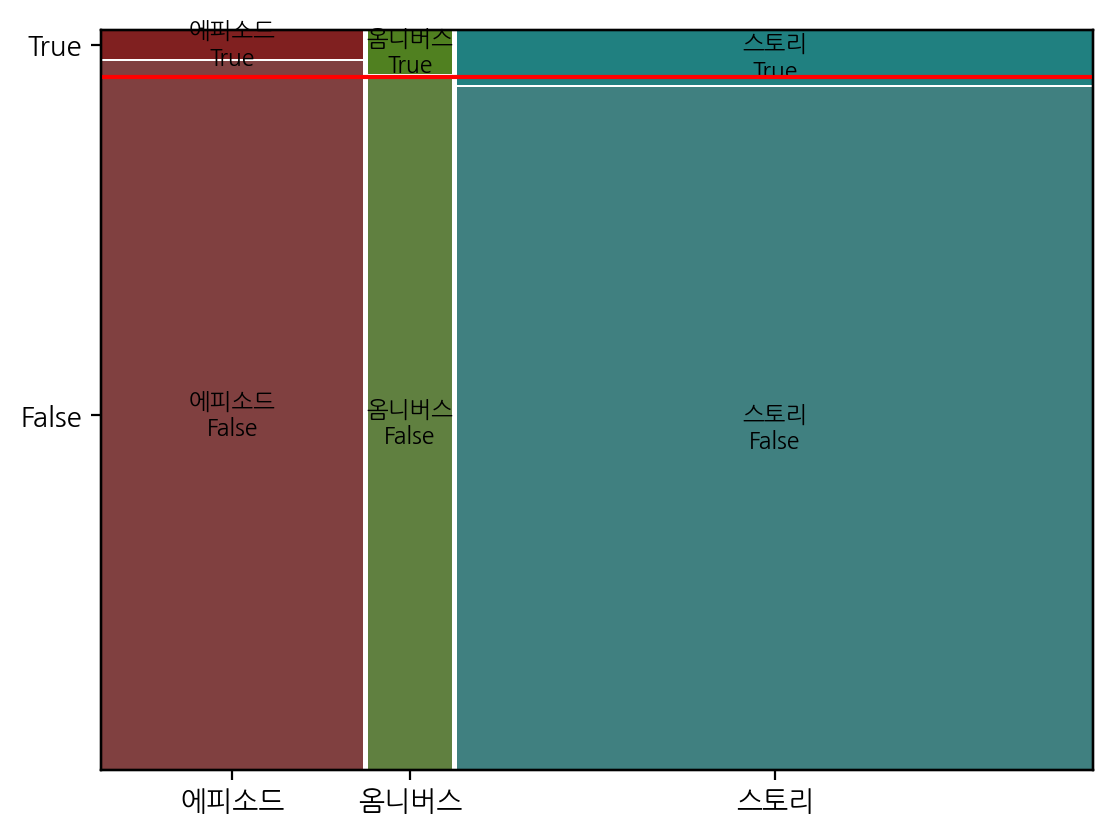

Chi2ContingencyResult(statistic=0.011580967855044406, pvalue=0.9942262486124557, dof=2, expected_freq=array([[0.94275942, 0.05724058],
       [0.94275942, 0.05724058],
       [0.94275942, 0.05724058]]))

In [723]:
# format 와 serial
format =pd.crosstab(challenge['format'], challenge['serial'], normalize='index')
mosaic(challenge, [ 'format','serial'])
plt.axhline(1- challenge['serial'].mean(), color = 'r')
plt.show()

# format.plot.bar(stacked=True)
# plt.axhline(1-challenge['serial'].mean(), color = 'r')
# plt.show()

spst.chi2_contingency(format)

# 4. 데이터 통합하기  -> 불가

In [772]:
# 우선 교집합이 있는가 확인하기
naver_author =list(naver['author'])
challenge_author = list(challenge['author'])

In [764]:
# '/'를 기준으로 값을 나누는 함수
def split_and_flatten_authors(authors):
    split_list = []
    for author in authors:
        split_list.extend(author.split(' / '))
    return split_list

In [774]:
# 중복제거
set_naver = set (split_and_flatten_authors(naver_author) )
set_challenge = set ( split_and_flatten_authors(challenge_author))

# 교집합이 있는가?
hap = set_naver & set_challenge

In [776]:
hap

set()

- 합칠 수 없었음.